In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_maestra = pd.read_excel("maestra.xlsx")
df_sexo = pd.read_excel("maestra.xlsx")
df_pregrado = pd.read_excel("tables.xlsx", sheet_name="pregrado")
df_secundaria = pd.read_excel("tables.xlsx", sheet_name="secundaria")

# Informe de Extracción de datos:

# Fondecyt 11241304, Re-conociendo las des-igualdades de la Academia Chilena: Un análisis interseccional de género y clase en las trayectorias de personas con grado de doctorado

## Sexo

La variable "SEXO_REGISTRADO" fue construida utilizando un enfoque combinado de herramientas automatizadas y supervisión humana. Inicialmente, se empleó el paquete `genderizeR` de R, una herramienta que permite inferir el género a partir de nombres propios. Este paquete utiliza bases de datos externas y modelos estadísticos para asignar probabilidades de género (masculino, femenino u otros) a cada nombre analizado. 

Sin embargo, dado que los resultados de herramientas automatizadas pueden contener errores o sesgos, se incorporó un proceso de supervisión humana individual.

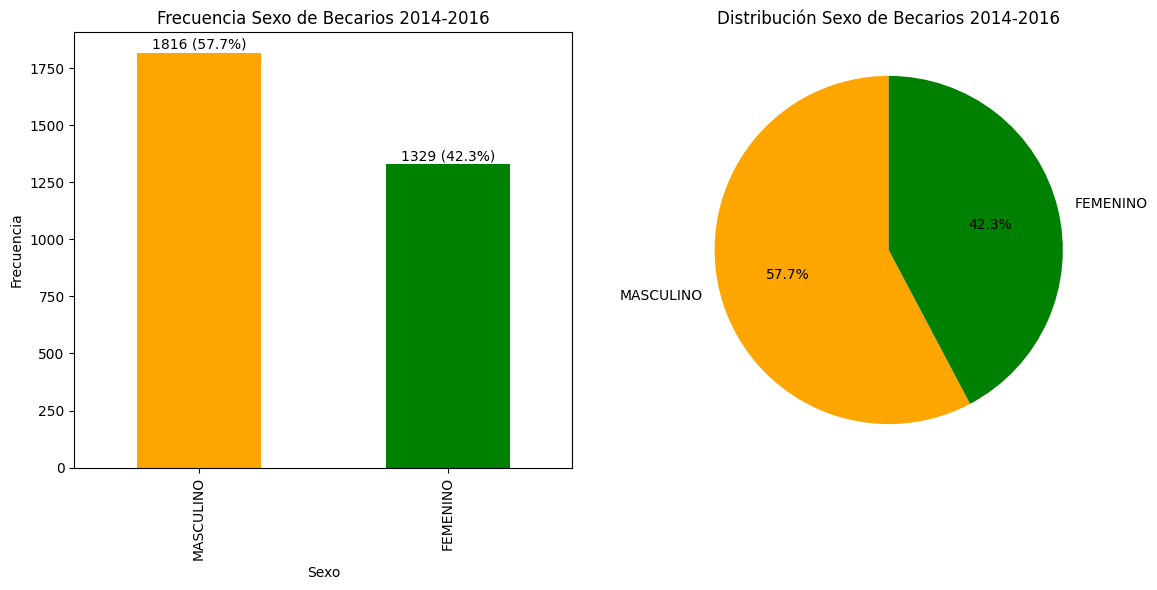

In [2]:
counts = df_sexo['SEXO_REGISTRADO'].value_counts()
colors = ['orange', 'green']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

counts.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title('Frecuencia Sexo de Becarios 2014-2016')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Frecuencia')
for index, value in enumerate(counts):
    axes[0].text(index, value + 5, f'{value} ({(value / 3145 * 100):.1f}%)', ha='center', va='bottom')

axes[1].pie(counts, labels=counts.index, autopct=lambda p: f'{p:.1f}%', colors=colors, startangle=90)
axes[1].set_title('Distribución Sexo de Becarios 2014-2016')

plt.tight_layout()
plt.show()


- **MASCULINO**: Hay un total de **1816** registros correspondientes a personas de sexo masculino. Esto representa aproximadamente el **57.7%** del total.
- **FEMENINO**: Hay un total de **1329** registros correspondientes a personas de sexo femenino. Esto representa aproximadamente el **42.3%** del total.


### Recursos:

Detalle del trabajo en: https://github.com/RodrigoMolinaAvila/Fondecyt-11241304/blob/main/Genderizaci%C3%B3n/Namesplit%20-%20Gender.R

## Pregrado

Los datos utilizados en este análisis provienen de diversas fuentes, incluyendo el **Portal del Investigador**, una plataforma oficial que centraliza información sobre investigadores y proyectos en Chile. Además, se realizó una exploración manual llevada a cabo por el personal técnico del proyecto Fondecyt, utilizando recursos como **LinkedIn**, **Scopus** y sitios web oficiales de universidades.

Para la calidad de los establecimientos de pregrado se realizó un procesamiento manual para establecer criterios categóricos y de localidad, las fuentes utilizadas fueron la pagina oficial de la **CNA (Comisión Nacional de Investigación)**.

Variables de calidad: acreditacion_pregrado, años_acreditacion_regrado, elite


Como consideraciones, de los 3145 registros totales de becarios, solo **3075 valores** contienen información verificable sobre el paso por la institución de pregrado. Este número fue aceptado como tope de la busqueda posible


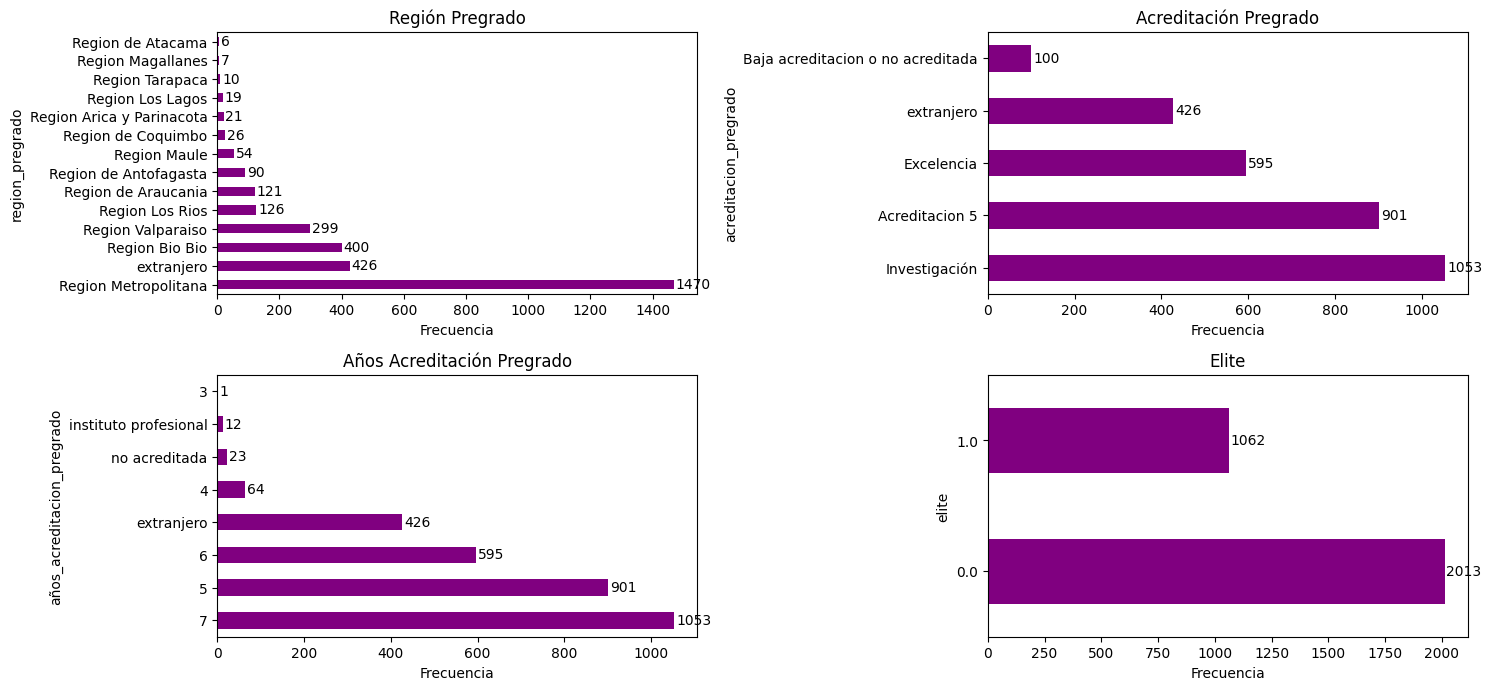

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

variables = ['region_pregrado', 'acreditacion_pregrado', 'años_acreditacion_pregrado', 'elite']
titles = ['Región Pregrado', 'Acreditación Pregrado', 'Años Acreditación Pregrado', 'Elite']

for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]
    counts = df_pregrado[var].value_counts()
    counts.plot(kind='barh', ax=ax, color='purple')
    ax.set_title(titles[i])
    ax.set_xlabel('Frecuencia')
    for index, value in enumerate(counts):
        ax.text(value + 5, index, str(value), va='center')

fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


#### Región Pregrado
- **Región Metropolitana**: 1470 registros (**47.8%** del total).
- **Extranjero**: 426 registros (**13.8%** del total).
- **Región del Biobío**: 400 registros (**13.0%** del total).
- **Región de Valparaíso**: 299 registros (**9.7%** del total).
- **Región de Los Ríos**: 126 registros (**4.1%** del total).
- **Región de Araucanía**: 121 registros (**3.9%** del total).
- **Región de Antofagasta**: 90 registros (**2.9%** del total).
- **Región del Maule**: 54 registros (**1.8%** del total).
- **Región de Coquimbo**: 26 registros (**0.8%** del total).
- **Región de Arica y Parinacota**: 21 registros (**0.7%** del total).
- **Región de Los Lagos**: 19 registros (**0.6%** del total).
- **Región de Tarapacá**: 10 registros (**0.3%** del total).
- **Región de Magallanes**: 7 registros (**0.2%** del total).
- **Región de Atacama**: 6 registros (**0.2%** del total).

#### Acreditación Pregrado
- **Investigación**: 1053 registros (**34.2%** del total).
- **Acreditación 5**: 901 registros (**29.3%** del total).
- **Excelencia**: 595 registros (**19.3%** del total).
- **Extranjero**: 426 registros (**13.8%** del total).
- **Baja acreditación o no acreditada**: 100 registros (**3.3%** del total).

#### Años de Acreditación Pregrado
- **7 años**: 1053 registros (**34.2%** del total).
- **6 años**: 901 registros (**29.3%** del total).
- **4 años**: 64 registros (**2.1%** del total).
- **No acreditada**: 23 registros (**0.7%** del total).
- **Instituto profesional**: 12 registros (**0.4%** del total).
- **Extranjero**: 426 registros (**13.8%** del total).

#### Elite
- **No elite (0)**: 2013 registros (**65.4%** del total).
- **Elite (1)**: 1062 registros (**34.6%** del total).

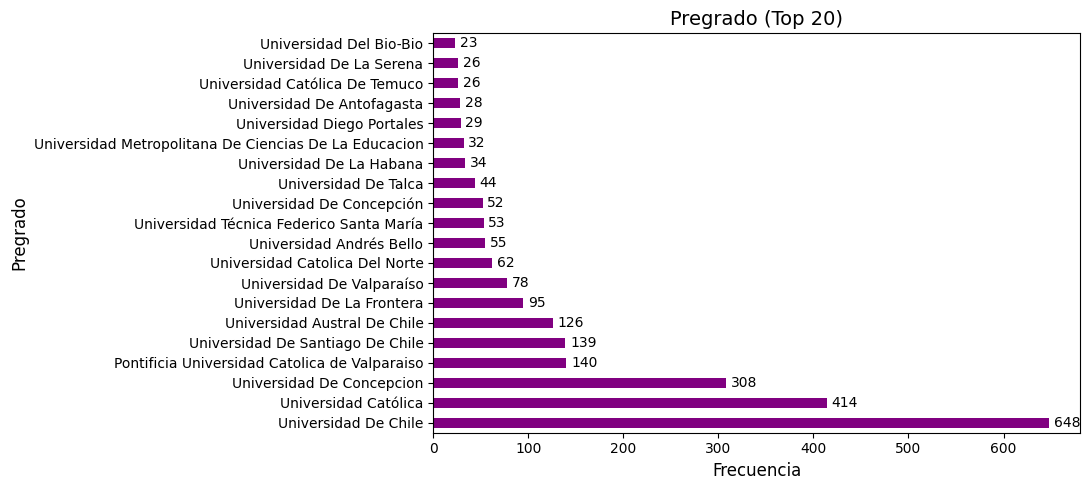

In [4]:
pregrado_counts = df_pregrado['pregrado'].value_counts().sort_values(ascending=False)
top_pregrado = pregrado_counts.head(20)


plt.figure(figsize=(11, 5))
ax = top_pregrado.plot(kind='barh', color='purple')
plt.title('Pregrado (Top 20)', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Pregrado', fontsize=12)

for index, value in enumerate(top_pregrado):
    plt.text(value + 5, index, str(value), va='center')

plt.tight_layout()
plt.show()


#### Top 20 Universidades de Pregrado

1. **Universidad De Chile**: **648 registros** (**21.1%**).
2. **Universidad Católica**: **414 registros** (**13.5%**).
3. **Universidad De Concepcion**: **308 registros** (**10.0%**).
4. **Pontificia Universidad Catolica de Valparaiso**: **140 registros** (**4.6%**).
5. **Universidad De Santiago De Chile**: **139 registros** (**4.5%**).
6. **Universidad Austral De Chile**: **126 registros** (**4.1%**).
7. **Universidad De La Frontera**: **95 registros** (**3.1%**).
8. **Universidad De Valparaíso**: **78 registros** (**2.5%**).
9. **Universidad Catolica Del Norte**: **62 registros** (**2.0%**).
10. **Universidad Andrés Bello**: **55 registros** (**1.8%**).
11. **Universidad Técnica Federico Santa María**: **53 registros** (**1.7%**).
12. **Universidad De Concepción**: **52 registros** (**1.7%**).
13. **Universidad De Talca**: **44 registros** (**1.4%**).
14. **Universidad De La Habana**: **34 registros** (**1.1%**).
15. **Universidad Metropolitana De Ciencias De La Educacion**: **32 registros** (**1.0%**).
16. **Universidad Diego Portales**: **29 registros** (**0.9%**).
17. **Universidad De Antofagasta**: **28 registros** (**0.9%**).
18. **Universidad Católica De Temuco**: **26 registros** (**0.8%**).
19. **Universidad De La Serena**: **26 registros** (**0.8%**).
20. **Universidad Del Bio-Bio**: **23 registros** (**0.7%**).


### Fix para Graph

In [5]:
m_enri = df_maestra[["FOLIO","NOMBRE_COMPLETO"]].merge(
    df_pregrado, left_on="NOMBRE_COMPLETO", right_on="NOMBRE", how="left"
)

total = len(m_enri)
sin_uni = int(m_enri["pregrado"].isna().sum())
print("FOLIO totales:", total, "| sin universidad:", sin_uni, "| tasa match:", f"{(total-sin_uni)/total:.2%}" if total else "NA")

FOLIO totales: 3146 | sin universidad: 326 | tasa match: 89.64%


In [9]:
import pandas as pd

# 1) propiedades (excluye identificadores y la clave 'pregrado')
cols_pre = [c for c in df_pregrado.columns if c not in ["NOMBRE", "ID", "pregrado"]]

# 2) agregación por universidad: primer no nulo
def first_not_null(s):
    x = s.dropna()
    return x.iloc[0] if len(x) else None

dim_uni = (
    m_enri[m_enri["pregrado"].notna()]
    .groupby("pregrado", as_index=False)[cols_pre]
    .agg(first_not_null)
)

# 3) IDs 1..x deterministas (orden alfabético)
dim_uni = dim_uni.sort_values("pregrado", kind="mergesort").reset_index(drop=True)
dim_uni["ID_PREGRADO"] = (dim_uni.index + 1)

# 4) tipado: ID_PREGRADO → string, elite → bool (robusto a 0/1/NaN)
dim_uni["ID_PREGRADO"] = dim_uni["ID_PREGRADO"].astype("Int64").astype("string")
if "elite" in dim_uni.columns:
    dim_uni["elite"] = (
        pd.to_numeric(dim_uni["elite"], errors="coerce")
        .fillna(0)
        .astype(int)
        .astype(bool)
    )

# 5) reordenar y exportar
dim_uni = dim_uni[["ID_PREGRADO", "pregrado"] + cols_pre]
dim_uni.to_csv("pregrado_universidad.csv", index=False, encoding="utf-8")

print("Universidades únicas:", len(dim_uni))
dim_uni.head()


Universidades únicas: 240


,ID_PREGRADO,pregrado,region_pregrado,acreditacion_pregrado,años_acreditacion_pregrado,elite
0,1,Academia Club De Teatro De Fernando González,Region Metropolitana,Baja acreditacion o no acreditada,instituto profesional,False
1,2,Academia Politecnica Aeronautica,extranjero,extranjero,extranjero,False
2,3,Accademia Di Belle Arti Di Firenze,extranjero,extranjero,extranjero,False
3,4,Beloit College,extranjero,extranjero,extranjero,False
4,5,Benemerita Universidad Autónoma De Puebla,extranjero,extranjero,extranjero,False


In [10]:
# mapa universidad -> ID_PREGRADO (string)
map_uni_id = dict(zip(dim_uni["pregrado"], dim_uni["ID_PREGRADO"]))

link = m_enri[["FOLIO", "pregrado"]].copy()
link["ID_PREGRADO"] = link["pregrado"].map(map_uni_id)
link = link[["FOLIO", "ID_PREGRADO"]]

# tipado del ID como string con soporte de <NA>
link["ID_PREGRADO"] = link["ID_PREGRADO"].astype("string")

link.to_csv("maestra_pregrado_link.csv", index=False, encoding="utf-8")

# diagnóstico
total = len(link)
sin_id = int(link["ID_PREGRADO"].isna().sum())
print("Total FOLIO:", total, "| sin ID_PREGRADO:", sin_id, "| tasa match:", f"{(total-sin_id)/total:.2%}" if total else "NA")
link.head()


Total FOLIO: 3146 | sin ID_PREGRADO: 326 | tasa match: 89.64%


,FOLIO,ID_PREGRADO
0,72160230,100
1,21150571,102
2,72170568,100
3,72170089,100
4,72170561,100


In [13]:
import pandas as pd

# cargar outputs
link = pd.read_csv("maestra_pregrado_link.csv", dtype={"ID_PREGRADO": "string"})
dim_uni = pd.read_csv("pregrado_universidad.csv", dtype={"ID_PREGRADO": "string"})

# si no tienes df_maestra en memoria, vuelve a cargarlo:
# df_maestra = pd.read_csv("maestra.csv")

# --- merge con la dimensión ---
m_master = (
    df_maestra.merge(link, on="FOLIO", how="left")
              .merge(dim_uni, on="ID_PREGRADO", how="left", suffixes=("", "_uni"))
)

# --- métricas generales de cobertura ---
total = len(m_master)
matched = m_master["ID_PREGRADO"].notna().sum()
print("=== COBERTURA DE ENLACE ===")
print(f"Total registros maestra: {total}")
print(f"Con ID_PREGRADO asignado: {matched}")
print(f"Proporción enlazada: {matched/total:.2%}")
print(f"Sin enlace: {total - matched} ({(total - matched)/total:.2%})")

# --- resumen por región del pregrado ---
if "region_pregrado" in m_master.columns:
    print("\n=== DISTRIBUCIÓN REGIONAL (sobre maestra) ===")
    reg_summary = (
        m_master["region_pregrado"]
        .value_counts(dropna=False)
        .rename_axis("region_pregrado")
        .reset_index(name="n")
    )
    reg_summary["%"] = reg_summary["n"] / total * 100
    display(reg_summary.head(10))

# --- resumen por acreditación ---
if "acreditacion_pregrado" in m_master.columns:
    print("\n=== DISTRIBUCIÓN DE ACREDITACIÓN (sobre maestra) ===")
    acc_summary = (
        m_master["acreditacion_pregrado"]
        .value_counts(dropna=False)
        .rename_axis("acreditacion_pregrado")
        .reset_index(name="n")
    )
    acc_summary["%"] = acc_summary["n"] / total * 100
    display(acc_summary.head(10))

# --- proporción de elite en la base maestra ---
if "elite" in m_master.columns:
    elite_mean = m_master["elite"].mean(skipna=True)
    print(f"\n=== ELITE ===\nProporción de universidades elite en becarios: {elite_mean:.2%}")
    print(m_master["elite"].value_counts(dropna=False))


=== COBERTURA DE ENLACE ===
Total registros maestra: 3150
Con ID_PREGRADO asignado: 2824
Proporción enlazada: 89.65%
Sin enlace: 326 (10.35%)

=== DISTRIBUCIÓN REGIONAL (sobre maestra) ===


,region_pregrado,n,%
0,Region Metropolitana,1353,42.952381
1,extranjero,399,12.666667
2,Region Bio Bio,365,11.587302
3,NaN,326,10.349206
4,Region Valparaiso,269,8.539683
5,Region Los Rios,113,3.587302
6,Region de Araucania,113,3.587302
7,Region de Antofagasta,80,2.539683
8,Region Maule,48,1.523810
9,Region de Coquimbo,23,0.730159



=== DISTRIBUCIÓN DE ACREDITACIÓN (sobre maestra) ===


,acreditacion_pregrado,n,%
0,Investigación,968,30.730159
1,Acreditacion 5,819,26.000000
2,Excelencia,543,17.238095
3,extranjero,399,12.666667
4,NaN,326,10.349206
5,Baja acreditacion o no acreditada,95,3.015873



=== ELITE ===
Proporción de universidades elite en becarios: 34.60%
elite
False    1847
True      977
NaN       326
Name: count, dtype: int64


In [15]:
import pandas as pd

# reutilizamos df_pre y m_master si los tienes en memoria;
# si no, carga los CSV
df_pre = pd.read_csv("pregrado_universidad.csv", dtype={"ID_PREGRADO": "string"})
link = pd.read_csv("maestra_pregrado_link.csv", dtype={"ID_PREGRADO": "string"})
df_maestra = pd.read_csv("maestra.csv")  # opcional si no está cargada

# merge para replicar la muestra
m_master = (
    df_maestra.merge(link, on="FOLIO", how="left")
              .merge(df_pre, on="ID_PREGRADO", how="left", suffixes=("", "_uni"))
)

# función de comparación
def compare_dist(var, label):
    base = (
        df_pre[var].value_counts(normalize=True, dropna=False)
        .rename("pct_base")
        .reset_index()
        .rename(columns={"index": var})
    )
    master = (
        m_master[var].value_counts(normalize=True, dropna=False)
        .rename("pct_master")
        .reset_index()
    )
    comp = pd.merge(base, master, on=var, how="outer").fillna(0)
    comp["diff_abs"] = (comp["pct_master"] - comp["pct_base"]).abs()
    comp["diff_%"] = (comp["diff_abs"] * 100).round(2)
    comp["pct_base"] = (comp["pct_base"] * 100).round(2)
    comp["pct_master"] = (comp["pct_master"] * 100).round(2)
    comp = comp.sort_values("pct_base", ascending=False)
    print(f"\n=== {label} ===")
    display(comp)
    return comp["diff_abs"].mean()

# comparar por las tres dimensiones
d_region = compare_dist("region_pregrado", "Región Pregrado")
d_acred = compare_dist("acreditacion_pregrado", "Acreditación Pregrado")
d_elite  = compare_dist("elite", "Elite")

# calcular score de consistencia (1 - promedio de diferencias absolutas)
score = 1 - pd.Series([d_region, d_acred, d_elite]).mean()
print(f"\n=== SCORE DE REPLICABILIDAD ESTRUCTURAL ===\n{score:.3f}")



=== Región Pregrado ===


,region_pregrado,pct_base,pct_master,diff_abs,diff_%
13,extranjero,75.00,12.67,0.623333,62.33
6,Region Metropolitana,15.00,42.95,0.279524,27.95
8,Region Valparaiso,2.50,8.54,0.060397,6.04
1,Region Bio Bio,2.08,11.59,0.095040,9.50
5,Region Maule,0.83,1.52,0.006905,0.69
9,Region de Antofagasta,0.83,2.54,0.017063,1.71
10,Region de Araucania,0.83,3.59,0.027540,2.75
0,Region Arica y Parinacota,0.42,0.63,0.002183,0.22
2,Region Los Lagos,0.42,0.57,0.001548,0.15
3,Region Los Rios,0.42,3.59,0.031706,3.17



=== Acreditación Pregrado ===


,acreditacion_pregrado,pct_base,pct_master,diff_abs,diff_%
4,extranjero,75.00,12.67,0.623333,62.33
1,Baja acreditacion o no acreditada,10.00,3.02,0.069841,6.98
0,Acreditacion 5,7.92,26.00,0.180833,18.08
2,Excelencia,5.00,17.24,0.122381,12.24
3,Investigación,2.08,30.73,0.286468,28.65
5,0,0.00,10.35,0.103492,10.35



=== Elite ===


,elite,pct_base,pct_master,diff_abs,diff_%
0,False,99.17,58.63,0.405317,40.53
1,True,0.83,31.02,0.301825,30.18
2,0,0.00,10.35,0.103492,10.35



=== SCORE DE REPLICABILIDAD ESTRUCTURAL ===
0.805


## Secundaria

In [9]:
df_secundaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      797 non-null    float64
 1   RBD     798 non-null    object 
 2   Nombre  798 non-null    object 
 3   comuna  798 non-null    object 
 4   region  798 non-null    object 
 5   gse     798 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB
